In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

PQ: BasePriorityQueue(nqueues:20, lag: 10000, add:1, pop:2); Average: 14.833883388338833; Median: 9


(array([1.14980442e-01, 7.76475163e-02, 2.94439382e-02, 4.69612179e-02,
        4.00040004e-02, 1.50946772e-02, 2.74561618e-02, 1.23614846e-02,
        2.25488387e-02, 2.24867207e-02, 1.08085343e-02, 2.15549505e-02,
        1.09327703e-02, 1.93808201e-02, 1.52189132e-02, 7.08145349e-03,
        1.38523169e-02, 5.90121124e-03, 1.02494722e-02, 1.16781865e-02,
        3.85131681e-03, 9.25558394e-03, 8.82075785e-03, 3.85131681e-03,
        7.88898766e-03, 3.04378264e-03, 6.21180130e-03, 5.03155906e-03,
        2.60895655e-03, 4.09978886e-03, 2.36048450e-03, 3.47860873e-03,
        3.29225469e-03, 1.86354039e-03, 2.67107456e-03, 1.11812423e-03,
        2.29836648e-03, 1.86354039e-03, 1.05600622e-03, 9.31770196e-04,
        9.93888209e-04, 4.96944104e-04, 9.93888209e-04, 4.34826091e-04,
        6.83298143e-04, 8.07534170e-04, 4.96944104e-04, 3.72708078e-04,
        3.72708078e-04, 5.59062117e-04, 2.48472052e-04, 6.21180130e-05,
        2.48472052e-04, 4.34826091e-04, 3.72708078e-04, 4.348260

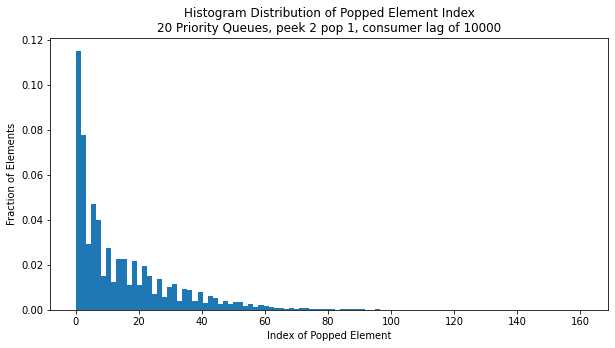

In [10]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

consumer_lag = 10000
num_iterations = 10000

pq1 = BasePriorityQueue(num_queues=20, num_queues_lb_add=1, num_queues_lb_pop=2)

out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()

plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Histogram Distribution of Popped Element Index\n20 Priority Queues, peek 2 pop 1, consumer lag of 10000")
plt.xlabel("Index of Popped Element")
plt.ylabel("Fraction of Elements")

plt.hist(out1, 100, density=True)

PQ: BasePriorityQueue(nqueues:20, lag: 35, add:1, pop:2); Num_pop: 9965; Concurrent: 100; Average: 30.115403913697943; Medium: 18; 90th percentile: 75; 99th percentile: 156; ErrorCount: 35


(array([5.33285418e-02, 3.01392712e-02, 2.52234171e-02, 2.19687826e-02,
        1.92226848e-02, 1.69173187e-02, 1.38321965e-02, 1.27134159e-02,
        1.22048792e-02, 1.08487815e-02, 9.86561072e-03, 8.13658616e-03,
        9.05195210e-03, 8.17048860e-03, 6.71268358e-03, 6.61097625e-03,
        6.00073229e-03, 5.62780543e-03, 5.18707368e-03, 4.47512239e-03,
        4.03439064e-03, 3.76317110e-03, 3.08512225e-03, 3.11902469e-03,
        2.50878073e-03, 2.00024410e-03, 2.37317096e-03, 2.30536608e-03,
        2.13585387e-03, 1.89853677e-03, 1.59341479e-03, 1.89853677e-03,
        1.62731723e-03, 1.86463433e-03, 1.18658548e-03, 1.08487815e-03,
        1.08487815e-03, 1.42390258e-03, 9.15365943e-04, 8.47561058e-04,
        1.01707327e-03, 8.81463501e-04, 5.08536635e-04, 6.78048847e-04,
        1.01707327e-03, 5.42439077e-04, 5.42439077e-04, 4.06829308e-04,
        4.40731750e-04, 2.37317096e-04, 3.39024423e-04, 4.06829308e-04,
        4.74634193e-04, 1.01707327e-04, 1.35609769e-04, 3.390244

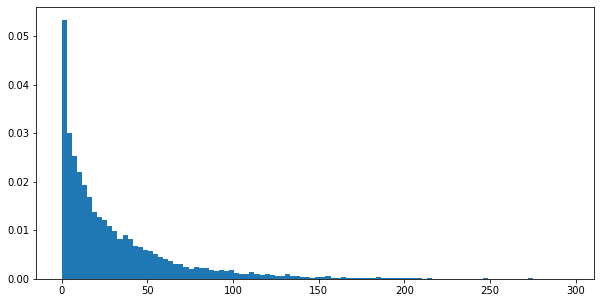

In [3]:
# with concurrent pop
import statistics
import random
from testrunner_v2 import TestRunnerV2
from distributed_pq import BasePriorityQueue
random.seed(5)

initial_item_count = 10000
num_pops = 10000
num_concurrent_pops = 100

pq1 = BasePriorityQueue(num_queues=20, num_queues_lb_add=1, num_queues_lb_pop=2)

out1, err1 = TestRunnerV2(queue=pq1, initial_item_count=initial_item_count, num_pops=num_pops, num_concurrent_pops = num_concurrent_pops).run()

plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(out1, 100, density=True)

In [4]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

x_list = []

average1_list = []
median1_list = []

average2_list = []
median2_list = []

average3_list = []
median3_list = []

for x in [x for x in range(1, 100000, 10000)]:
    print(x)
    num_queues = 20
    consumer_lag = x # 10000
    num_iterations = 10000
    
    pq1 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=1)
    out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq2 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=2, num_queues_lb_pop=1)
    out2 = TestRunner(queue=pq2, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq3 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=2)
    out3 = TestRunner(queue=pq3, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    x_list.append(x)
    average1_list.append(statistics.mean(out1))
    median1_list.append(statistics.median(out1))
    average2_list.append(statistics.mean(out2))
    median2_list.append(statistics.median(out2))
    average3_list.append(statistics.mean(out3))
    median3_list.append(statistics.median(out3))
    

1
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:1, pop:1); Average: 0.47014701470147013; Median: 0
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:2, pop:1); Average: 0.4957495749574958; Median: 0
PQ: BasePriorityQueue(nqueues:20, lag: 1, add:1, pop:2); Average: 0.3092309230923092; Median: 0
10001
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:1, pop:1); Average: 150.2966296629663; Median: 58
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:2, pop:1); Average: 81.87048704870487; Median: 33
PQ: BasePriorityQueue(nqueues:20, lag: 10001, add:1, pop:2); Average: 15.245424542454245; Median: 9
20001
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:1, pop:1); Average: 238.77547754775478; Median: 112
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:2, pop:1); Average: 106.74587458745874; Median: 65
PQ: BasePriorityQueue(nqueues:20, lag: 20001, add:1, pop:2); Average: 15.389738973897389; Median: 10
30001
PQ: BasePriorityQueue(nqueues:20, lag: 30001, add:1, pop:1); Average: 178.2879287928792

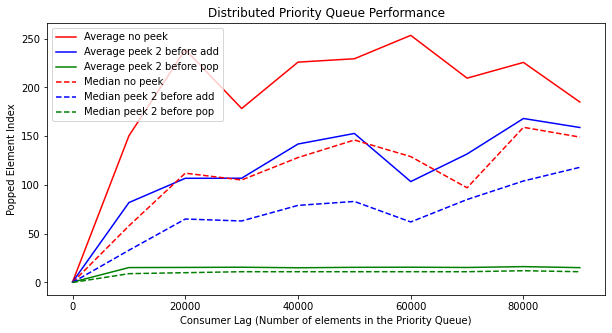

In [12]:
plt.plot(x_list, average1_list, 'r-', label="Average no peek")
plt.plot(x_list, average2_list, 'b-', label="Average peek 2 before add")
plt.plot(x_list, average3_list, 'g-', label="Average peek 2 before pop")

plt.plot(x_list, median1_list, 'r--', label="Median no peek")
plt.plot(x_list, median2_list, 'b--', label="Median peek 2 before add")
plt.plot(x_list, median3_list, 'g--', label="Median peek 2 before pop")

plt.legend()
plt.title("Distributed Priority Queue Performance")
plt.xlabel("Consumer Lag (Number of elements in the Priority Queue)")
plt.ylabel("Popped Element Index")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [15]:
import statistics
import random
from testrunner import TestRunner
from distributed_pq import BasePriorityQueue
random.seed(5)

x_list = []

average1_list = []
median1_list = []

average2_list = []
median2_list = []

for x in range(1, 100, 5):
    print(x)
    num_queues = 100
    consumer_lag = 10000
    num_iterations = 10000
    
    pq1 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=x, num_queues_lb_pop=1)
    out1 = TestRunner(queue=pq1, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    pq2 = BasePriorityQueue(num_queues=num_queues, num_queues_lb_add=1, num_queues_lb_pop=x)
    out2 = TestRunner(queue=pq2, consumer_lag=consumer_lag, num_iterations=num_iterations).run()
    
    x_list.append(x)
    average1_list.append(statistics.mean(out1))
    median1_list.append(statistics.median(out1))
    average2_list.append(statistics.mean(out2))
    median2_list.append(statistics.median(out2))
    

1
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:1); Average: 444.66246624662466; Median: 232
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:1); Average: 415.1991199119912; Median: 206
6
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:6, pop:1); Average: 210.66976697669767; Median: 130
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:6); Average: 18.576357635763575; Median: 13
11
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:11, pop:1); Average: 214.00790079007902; Median: 127
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:11); Average: 9.218321832183218; Median: 6
16
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:16, pop:1); Average: 217.62306230623062; Median: 138
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:16); Average: 6.043504350435043; Median: 4
21
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:21, pop:1); Average: 218.46614661466145; Median: 137
PQ: BasePriorityQueue(nqueues:100, lag: 10000, add:1, pop:21); 

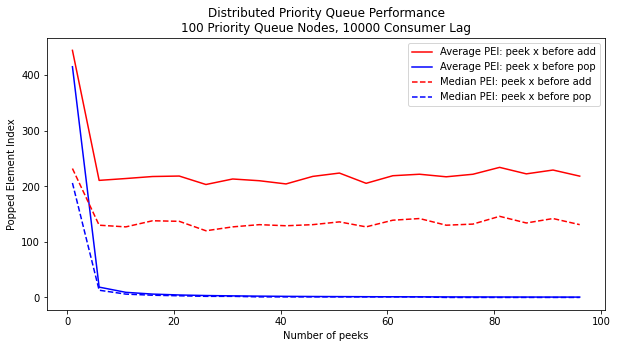

In [16]:
plt.plot(x_list, average1_list, 'r-', label="Average PEI: peek x before add")
plt.plot(x_list, average2_list, 'b-', label="Average PEI: peek x before pop")
plt.plot(x_list, median1_list, 'r--', label="Median PEI: peek x before add")
plt.plot(x_list, median2_list, 'b--', label="Median PEI: peek x before pop")

plt.legend()
plt.title("Distributed Priority Queue Performance\n100 Priority Queue Nodes, 10000 Consumer Lag")
plt.xlabel("Number of peeks")
plt.ylabel("Popped Element Index")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()